In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

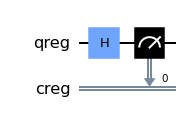

In [3]:
# define a quantum register with one qubit
q =  QuantumRegister(1,"qreg")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c = ClassicalRegister(1,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
qc.h(q[0])

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw(output='mpl') # re-run the cell if the figure is not displayed

Run it on simulator

{'0': 5007, '1': 4993}

State 0 is observed with frequency % 50.07
State 1 is observed with frequency % 49.93



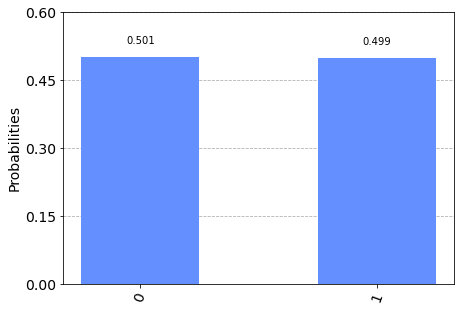

In [4]:
# execute the circuit 10000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

print()
n_zeros = counts['0']
n_ones = counts['1']
print("State 0 is observed with frequency %",100*n_zeros/(n_zeros+n_ones))
print("State 1 is observed with frequency %",100*n_ones/(n_zeros+n_ones))

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Run it on real device

In [5]:
provider = IBMQ.get_provider("ibm-q")

In [6]:
#using this tool to monitor our position in queue
from qiskit.tools.monitor import job_monitor

#choose real device
backend = provider.get_backend('ibmq_lima')

In [ ]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job is queued (16)    

Take the results of the job

In [ ]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)